In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1 Prove Theorem 14.1

The case for expectation is fairly straightforward. Let's prove: 
$$
\mathbb{V}(a^TX) = a^T \Sigma a
$$
and 
$$
\mathbb{V}(AX) = A \Sigma A
$$
where $\Sigma$ is the covariance matrix.

#### 1)

$$
a^T X = \begin{pmatrix}a_1 & \cdots & a_k\end{pmatrix} \begin{pmatrix} X_1 \\ \vdots \\ X_k \end{pmatrix} = \sum_{i=1}^k a_i X_i
$$ 

Then, we have
$$
\begin{align}
\mathbb{V}\left(a^T X\right) &= \mathbb{V}\left( \sum_{i=1}^k a_i X_i \right) \\
&= \mathbb{E}\left(\left( \sum_{i=1}^k a_i X_i \right)^2\right) - \left(\mathbb{E}\left( \sum_{i=1}^k a_i X_i \right)\right)^2 \\
&= \mathbb{E} \left(\sum_{i=1}^k \sum_{j=1}^k a_i a_j X_i X_j \right) - \sum_{l=1}^k \sum_{m=1}^k a_l a_m \mathbb{E}(X_l)\mathbb{E}(X_m) \\
&= \sum_{i=1}^k \sum_{j=1}^k a_i a_j \left( \mathbb{E}(X_iX_j) -  \mathbb{E}(X_i)\mathbb{E}(X_j) \right) \\
&= \begin{pmatrix} a_1 & \cdots & a_k \end{pmatrix} 
\begin{pmatrix} 
\mathbb V(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_k) \\
\vdots & \vdots & \vdots & \vdots \\
\text{Cov}(X_k, X_1) & \text{Cov}(X_k, X_2) & \cdots & \mathbb V(X_k)
\end{pmatrix}
\begin{pmatrix} a_1 \\ \vdots \\ a_k \end{pmatrix} \\
&= a^T \Sigma a
\end{align}
$$

#### 2)

Suppose $A$ is $m\times k$ matrix, then we can write:
$$
AX = \begin{pmatrix}A_{1\cdot} \\ \vdots \\ A_{m\cdot}\end{pmatrix} X = \begin{pmatrix}A_{1\cdot}X \\ \vdots \\ A_{m\cdot}X\end{pmatrix} 
$$
where $A_{i\cdot}X = \sum_{j=1}^k A_{ij}X_j$.

From Eq.(14.2), we know the $\{k, l\}$ element for $\mathbb{V}(AX)$

1) $k=l$
$$
\mathbb V(\sum_{j=1}^k A_{kj}X_j) = A_{k\cdot} \Sigma A_{k\cdot}^T
$$

2) $k\neq l$
$$
\text{Cov}(\sum_{j=1}^k A_{kj}X_j, \sum_{j=1}^k A_{lj}X_j) = A_{k\cdot} \Sigma A_{l\cdot}^T
$$

Case 1) and 2) suggests that $\mathbb{V}(AX)_{kl}$ is the $\{k, l\}$ element of $A\Sigma A^T$, as $\{k, l\}$ element of $A\Sigma A^T$ is
$$
\sum_{i}\sum_{j}A_{ki}\Sigma_{ij}A_{jl}^T = \sum_{i}\sum_{j}A_{ki}\Sigma_{ij}A_{lj} =  A_{k\cdot} \Sigma A_{l\cdot}^T
$$

Hence,
$$
\mathbb{V}(AX)_{kl} = A\Sigma A^T
$$

### 5

In [15]:
mu = np.array((3,8))
sigma = np.array([[1,1], [1, 2]])
n = 100

In [39]:
X = np.random.multivariate_normal(mu, sigma, size=n)
print("shape of X: ", X.shape)

print("mean estmimation", X.mean(axis=0))

sigma_hat = 1/(n-1) * np.matmul((X - X.mean(axis=0, keepdims=True)).T, X-X.mean(axis=0, keepdims=True))
print("sigma estimation\n", sigma_hat)

X1 = X[:, 0]
X2 = X[:, 1]
sigma1 = np.sqrt(1/(n-1) * np.sum((X1-X1.mean())**2))
sigma2 = np.sqrt(1/(n-1) * np.sum((X2-X2.mean())**2))

rho = np.mean((X1-X1.mean())*(X2-X2.mean()))/(sigma1 * sigma2)

print("\n correlation between X1 and X2: ", rho)

shape of X:  (100, 2)
mean estmimation [ 3.0603026   8.03905989]
sigma estimation
 [[ 0.93156705  1.0376127 ]
 [ 1.0376127   2.12578204]]

 correlation between X1 and X2:  0.729968375227


Text(0,0.5,'X2')

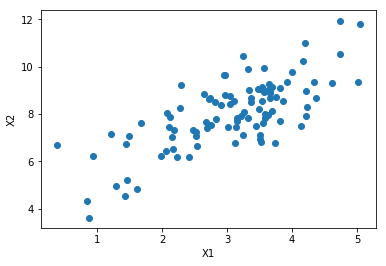

In [41]:
plt.scatter(X1, X2)
plt.xlabel('X1')
plt.ylabel('X2')

#### Fisher's method to find the 95% interval for $\rho$

In [42]:
from scipy.stats import norm

norm.cdf(1.96)

0.97500210485177952

In [44]:
theta = 0.5 * (np.log(1+rho) - np.log(1-rho))
se_theta = 1 / np.sqrt(n-3)
a, b = theta - 1.96 * se_theta, theta + 1.96 * se_theta
print(a, b)

lrho, hrho = (np.exp(2*a)-1)/(np.exp(2*a)+1), (np.exp(2*b)-1)/(np.exp(2*b)+1)
print("95 percent interval for rho is: (%.3f, %.3f)"%(lrho, hrho))

0.729651814725 1.12766751146
95 percent interval for rho is: (0.623, 0.810)


#### Bootstrap

In [67]:
B = 1000
rho_B = []

for _ in range(B):
    order = np.random.choice(np.arange(100), size=n, replace=True)
    X1b = X1[order]
    X2b = X2[order]
    sigma1b = np.sqrt(1/(n-1) * np.sum((X1b-X1b.mean())**2))
    sigma2b = np.sqrt(1/(n-1) * np.sum((X2b-X2b.mean())**2))

    rhob = np.mean((X1b-X1b.mean())*(X2b-X2b.mean()))/(sigma1b * sigma2b)
    rho_B.append(rhob)

In [68]:
rho_B = np.array(rho_B)
print("bootstrap interval for rho: (%.3f, %.3f)", np.percentile(rho_B, 2.5), np.percentile(rho_B, 97.5))

bootstrap interval for rho: (%.3f, %.3f) 0.622763177893 0.809890561509
